In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import metrics
import pickle


In [63]:
display (os.getcwd())

"C:\\Users\\Mandloi's PC\\Desktop\\Projects\\Final Year Project\\3dprinting"

In [64]:
os.chdir(r"C:\Users\Mandloi's PC\Desktop\Projects\Final Year Project\3dprinting")
os.getcwd()

"C:\\Users\\Mandloi's PC\\Desktop\\Projects\\Final Year Project\\3dprinting"

In [122]:
df=pd.read_csv("data.csv")


In [66]:
print (df.shape)

(50, 12)


In [67]:
display (df.describe())

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation
count,50.000000,48.000000,48.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.291667,53.541667,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.960437,25.137036,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.000000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.000000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.250000,80.000000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.000000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


In [68]:
display (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      48 non-null     float64
 2   infill_density      48 non-null     float64
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(4), int64(6), object(2)
memory usage: 4.8+ KB


None

In [69]:
display (df.isna().sum() )

layer_height          0
wall_thickness        2
infill_density        2
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strength      0
elongation            0
dtype: int64

From the above info() function, the completeness of the dataset is checked before proceeding. 

Unfortunately, there are null values present in "Wall Thickness" and "Infill Density"


In [70]:
df['wall_thickness'].replace([np.nan], df['wall_thickness'].mean(), inplace=True)
df['infill_density'].replace([np.nan], df['infill_density'].mean(), inplace=True)

In [72]:
df['wall_thickness']=df['wall_thickness'].round()
df['infill_density']=df['infill_density'].round()
print(df)

    layer_height  wall_thickness  infill_density infill_pattern  \
0           0.02             8.0            90.0           grid   
1           0.02             7.0            90.0      honeycomb   
2           0.02             1.0            80.0           grid   
3           0.02             4.0            70.0      honeycomb   
4           0.02             6.0            90.0           grid   
5           0.02            10.0            40.0      honeycomb   
6           0.02             5.0            10.0           grid   
7           0.02            10.0            10.0      honeycomb   
8           0.02             9.0            70.0           grid   
9           0.02             8.0            40.0      honeycomb   
10          0.06             6.0            80.0           grid   
11          0.06             2.0            20.0      honeycomb   
12          0.06            10.0            50.0           grid   
13          0.06             6.0            10.0      honeycom

But, the average values imputed in place of NaN values were floating points, thus we round-off the values using the .round() function.

In [73]:
df['material']=df['material'].str.lower()
print(df)

    layer_height  wall_thickness  infill_density infill_pattern  \
0           0.02             8.0            90.0           grid   
1           0.02             7.0            90.0      honeycomb   
2           0.02             1.0            80.0           grid   
3           0.02             4.0            70.0      honeycomb   
4           0.02             6.0            90.0           grid   
5           0.02            10.0            40.0      honeycomb   
6           0.02             5.0            10.0           grid   
7           0.02            10.0            10.0      honeycomb   
8           0.02             9.0            70.0           grid   
9           0.02             8.0            40.0      honeycomb   
10          0.06             6.0            80.0           grid   
11          0.06             2.0            20.0      honeycomb   
12          0.06            10.0            50.0           grid   
13          0.06             6.0            10.0      honeycom

As evident, print material been used was ABS and PLA, but in the dataset, inconsistencies in the input string cases was observed, which shall lead to errors during, the transmogrification of the labels into the numeric form to change it into a form that can be read by the machine, later in the preprocessing. 

Thus, using the str.lower() function, all the entries were made lowercase for uniformity.

In [74]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoded_df = pd.get_dummies(df, columns = ['infill_pattern','material'])
print(one_hot_encoded_df)

df=one_hot_encoded_df


    layer_height  wall_thickness  infill_density  nozzle_temperature  \
0           0.02             8.0            90.0                 220   
1           0.02             7.0            90.0                 225   
2           0.02             1.0            80.0                 230   
3           0.02             4.0            70.0                 240   
4           0.02             6.0            90.0                 250   
5           0.02            10.0            40.0                 200   
6           0.02             5.0            10.0                 205   
7           0.02            10.0            10.0                 210   
8           0.02             9.0            70.0                 215   
9           0.02             8.0            40.0                 220   
10          0.06             6.0            80.0                 220   
11          0.06             2.0            20.0                 225   
12          0.06            10.0            50.0                

Many machine learning methods cannot directly work with label data. Each of the input and output factors must be a number.

In general, this is more of a limitation on the effective application of machine learning algorithms than it is a strict restriction on the algorithms themselves.

# Label Encoding
Popular encoding methods for categorical variables include label encoding. According to this method, an individual number is given to each label based on alphabetical order.

# One Hot Encoding
Another widely used method for handling categorical values is one-hot encoding. It merely generates new features based on how many distinct values there are in the category feature. The category's individual values will all be introduced as features.

Since, our dataset does not demand a degree of importance or a weightage to the categorical variables and they are simply distinct to each other, we perform One Hot Encoding



In [76]:
print(df.shape)

(50, 14)


In [77]:
print(df.columns)

Index(['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'roughness', 'tension_strength', 'elongation', 'infill_pattern_grid',
       'infill_pattern_honeycomb', 'material_abs', 'material_pla'],
      dtype='object')


The columns of infill pattern and material has been replaced by numeric columns for the string variables (binary values assigned to each categorical value), as visible below through the last 4 columns.

In [78]:
df.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,infill_pattern_grid,infill_pattern_honeycomb,material_abs,material_pla
0,0.02,8.0,90.0,220,60,40,0,25,18,1.2,1,0,1,0
1,0.02,7.0,90.0,225,65,40,25,32,16,1.4,0,1,1,0
2,0.02,1.0,80.0,230,70,40,50,40,8,0.8,1,0,1,0
3,0.02,4.0,70.0,240,75,40,75,68,10,0.5,0,1,1,0
4,0.02,6.0,90.0,250,80,40,100,92,5,0.7,1,0,1,0


In [79]:
corr = df.corr()
display (corr)


,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,infill_pattern_grid,infill_pattern_honeycomb,material_abs,material_pla
layer_height,1.000000e+00,-0.174195,0.030019,8.332953e-16,1.024570e-15,-5.550085e-02,-1.103383e-16,0.801341,0.338230,0.507583,1.175539e-16,-4.353849e-18,-1.306155e-16,8.707699e-17
wall_thickness,-1.741950e-01,1.000000,0.111529,-1.476771e-01,-5.418785e-02,-4.304108e-01,-5.418785e-02,-0.219016,0.418570,0.199035,-1.532664e-01,1.532664e-01,-1.393331e-01,1.393331e-01
infill_density,3.001931e-02,0.111529,1.000000,2.457190e-01,1.044495e-02,-1.170344e-01,1.044495e-02,0.144180,0.318909,0.137550,2.215710e-01,-2.215710e-01,2.642439e-01,-2.642439e-01
nozzle_temperature,8.332953e-16,-0.147677,0.245719,1.000000e+00,6.024534e-01,-5.901839e-16,6.024534e-01,0.348611,-0.405908,-0.527447,1.703995e-01,-1.703995e-01,7.838379e-01,-7.838379e-01
bed_temperature,1.024570e-15,-0.054188,0.010445,6.024534e-01,1.000000e+00,9.681476e-16,1.000000e+00,0.192142,-0.252883,-0.300871,-5.024296e-18,2.009718e-17,-1.457046e-16,1.406803e-16
print_speed,-5.550085e-02,-0.430411,-0.117034,-5.901839e-16,9.681476e-16,1.000000e+00,-1.312743e-17,0.121066,-0.264590,-0.234052,-5.318094e-17,7.251946e-18,-3.384242e-17,-3.867705e-17
fan_speed,-1.103383e-16,-0.054188,0.010445,6.024534e-01,1.000000e+00,-1.312743e-17,1.000000e+00,0.192142,-0.252883,-0.300871,1.607775e-17,-4.019437e-18,4.019437e-18,4.019437e-18
roughness,8.013409e-01,-0.219016,0.144180,3.486108e-01,1.921416e-01,1.210657e-01,1.921416e-01,1.000000,0.051617,0.098962,6.834030e-02,-6.834030e-02,2.331730e-01,-2.331730e-01
tension_strength,3.382296e-01,0.418570,0.318909,-4.059076e-01,-2.528832e-01,-2.645905e-01,-2.528832e-01,0.051617,1.000000,0.838109,-9.053946e-03,9.053946e-03,-2.897263e-01,2.897263e-01
elongation,5.075830e-01,0.199035,0.137550,-5.274466e-01,-3.008708e-01,-2.340521e-01,-3.008708e-01,0.098962,0.838109,1.000000,-4.613808e-02,4.613808e-02,-3.947369e-01,3.947369e-01


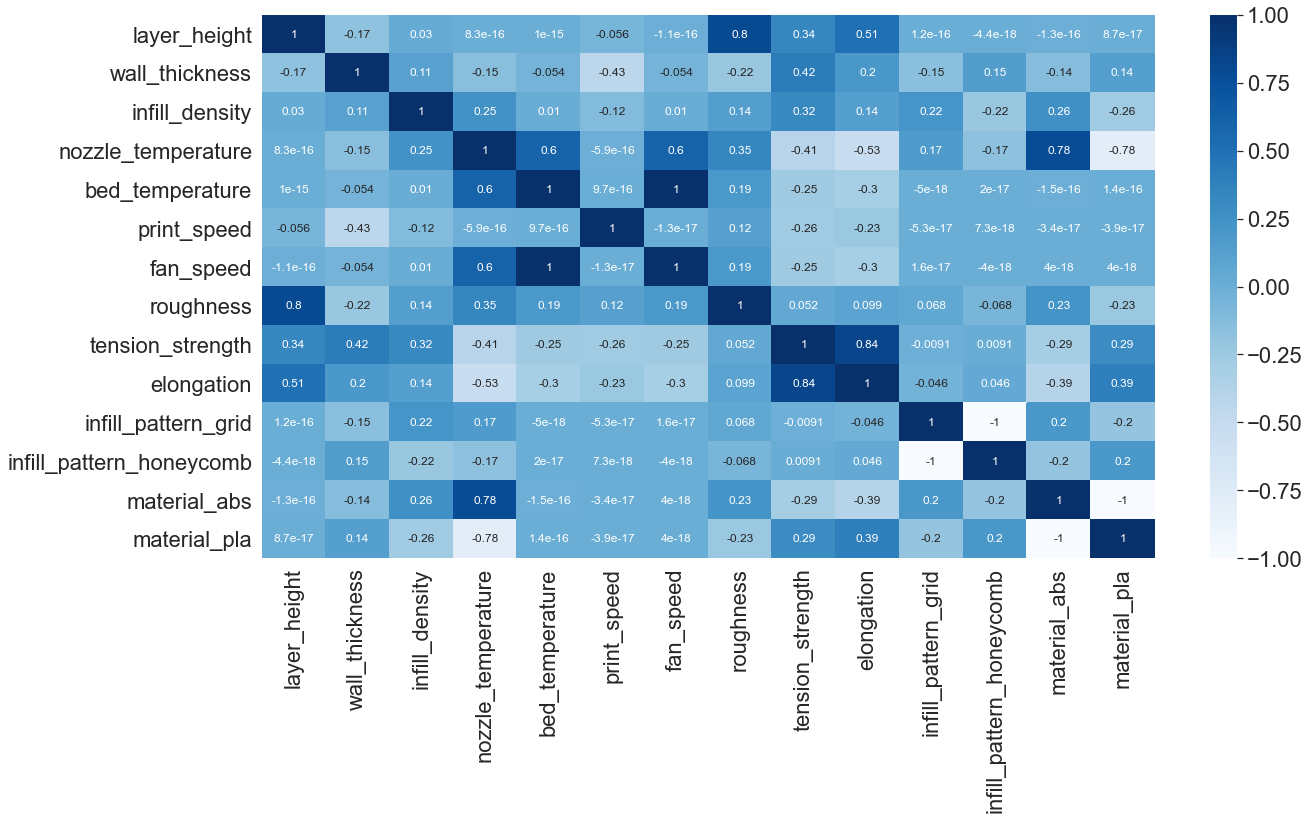

In [80]:
sns.set(font_scale=2)
dataplot = sns.heatmap(df.corr(),cmap = "Blues", annot=True, annot_kws={'size': 12})
sns.set(rc={'figure.figsize': (20, 10)})


This is a correlation matrix, which showcases the potential relations between two variables calculated based on the statistical concept of 'Co-relation or Dependancy'. Here, we attempt to deduce any correlation between the input variables and output variables. 

SIGNIFICANT POSITIVE CORRELATIONS

Layer Height and Roughness = 0.8

Layer Height and Elongation % = 0.51

Wall Thickness and Tension Strength = 0.42

PLA and Elongation = 0.39

SIGNIFICANT NEGATIVE CORRELATIONS

Nozzle Temperature and Elongation = -0.53

Nozzle Temperature and Tensile Strength = -0.41

A positive correlation exists when two variables operate in unison so that when one variable rises or falls, the other does the same.
A negative correlation is when two variables move opposite one another so that when one variable rises, the other falls.

Now we split the dataset into X and Y1, Y2 and Y3

# Y1 is an array for roughness

# Y2 is an array for tensile strength

# Y3 is an array for elongation

In [81]:
x = df.drop(columns=['roughness','tension_strength','elongation'],axis=1)
print(x)

    layer_height  wall_thickness  infill_density  nozzle_temperature  \
0           0.02             8.0            90.0                 220   
1           0.02             7.0            90.0                 225   
2           0.02             1.0            80.0                 230   
3           0.02             4.0            70.0                 240   
4           0.02             6.0            90.0                 250   
5           0.02            10.0            40.0                 200   
6           0.02             5.0            10.0                 205   
7           0.02            10.0            10.0                 210   
8           0.02             9.0            70.0                 215   
9           0.02             8.0            40.0                 220   
10          0.06             6.0            80.0                 220   
11          0.06             2.0            20.0                 225   
12          0.06            10.0            50.0                

In [82]:
y1=df['roughness']
y2=df['tension_strength']
y3=df['elongation']

In [83]:
from sklearn.model_selection import train_test_split

Now we split the data into training and testing data, the following arrays of data variables will be made:

X_train, X_test

Y1_train, Y2_test

Y2_train, Y2_test

Y3_train, Y3_test

In [84]:
x_train, x_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(x,y1,y2,y3, test_size=0.3, random_state=0)

In [85]:
print(x_train.shape)

(35, 11)


In [86]:
print(y1_train.shape)

(35,)


In [87]:
print(y2_train.shape)

(35,)


In [88]:
print(y3_train.shape)

(35,)


In [89]:
print(y1_test.shape)

(15,)


The dataset has been split into X, Y1, Y2 and Y3

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def train1(model, x, y1,x_test,y1_test):
    # training the model
    model.fit(x, y1)
    pred = model.predict(x)
    # perform cross-validation
    cv_score = cross_val_score(model, x, y1, scoring='neg_mean_squared_error' ,cv=20)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("CV Score:", cv_score)
    print("R2_Score:", r2_score(y1,pred))
    print("R2_Score on testing:", r2_score(y1_test,model.predict(x_test)))

def train2(model, x, y2,x_test,y2_test):
    # training the model
    model.fit(x, y2)
    pred = model.predict(x)
    # perform cross-validation
    cv_score = cross_val_score(model, x, y2, scoring='neg_mean_squared_error',cv=20)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("CV Score:", cv_score)
    print("R2_Score:", r2_score(y2,pred))
    print("R2_Score on testing:", r2_score(y2_test,model.predict(x_test)))


def train3(model, x, y3,x_test,y3_test):
    # training the model
    model.fit(x, y3)
    pred = model.predict(x)
    # perform cross-validation
    cv_score = cross_val_score(model, x, y3, scoring='neg_mean_squared_error',cv=15)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("CV Score:", cv_score)
    print("R2_Score:", r2_score(y3,pred))
    print("R2_Score on testing:", r2_score(y3_test,model.predict(x_test)))


# Linear Regression

Model Report
CV Score: 1598.1702316352098
R2_Score: 0.9202221172840315
R2_Score on testing: 0.6134013409966543
material_abs                -209.114660
fan_speed                     -4.242494
bed_temperature               -0.848499
infill_pattern_honeycomb      -0.397598
infill_density                -0.074997
infill_pattern_grid            0.397598
print_speed                    0.705297
wall_thickness                 5.746412
nozzle_temperature            20.170259
material_pla                 209.114660
layer_height                1316.088197
dtype: float64


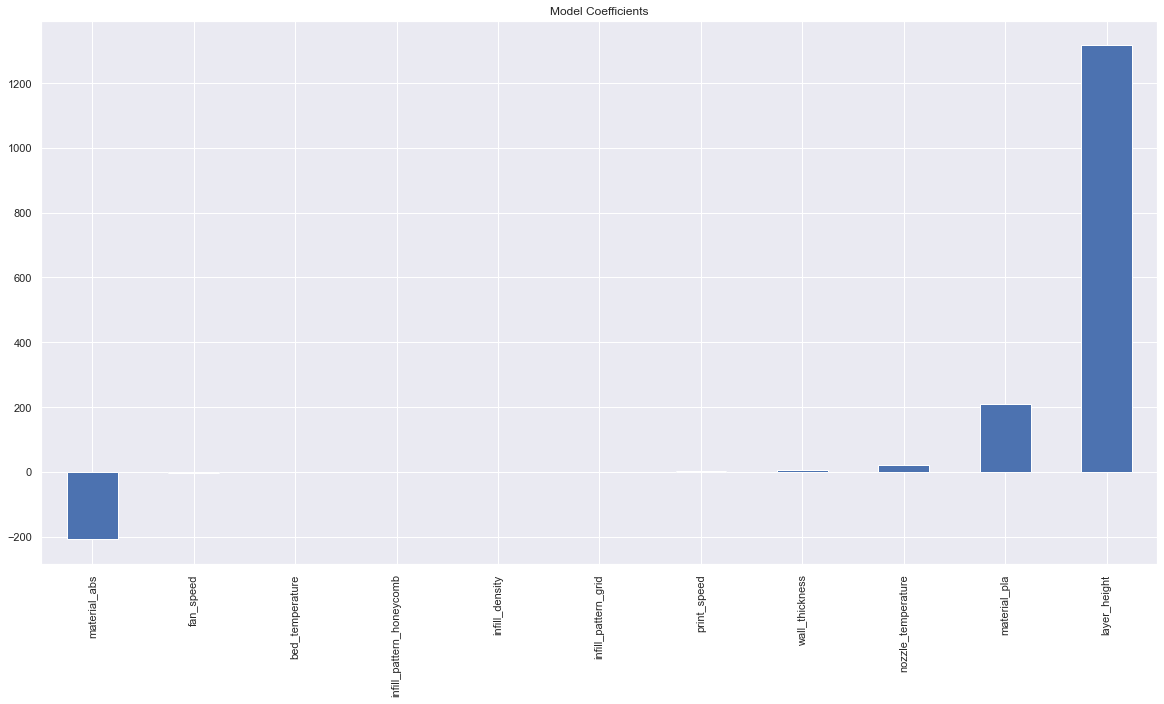

In [91]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train1(model,x_train, y1_train,x_test,y1_test)
coef = pd.Series(model.coef_, x.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
CV Score: 38.10573230367954
R2_Score: 0.6344187124120811
R2_Score on testing: 0.5480935580965728
material_pla                -4.870706
nozzle_temperature          -0.627263
infill_pattern_honeycomb    -0.616524
print_speed                 -0.024675
bed_temperature              0.024223
infill_density               0.114103
fan_speed                    0.121113
infill_pattern_grid          0.616524
wall_thickness               1.079772
material_abs                 4.870706
layer_height                53.360728
dtype: float64


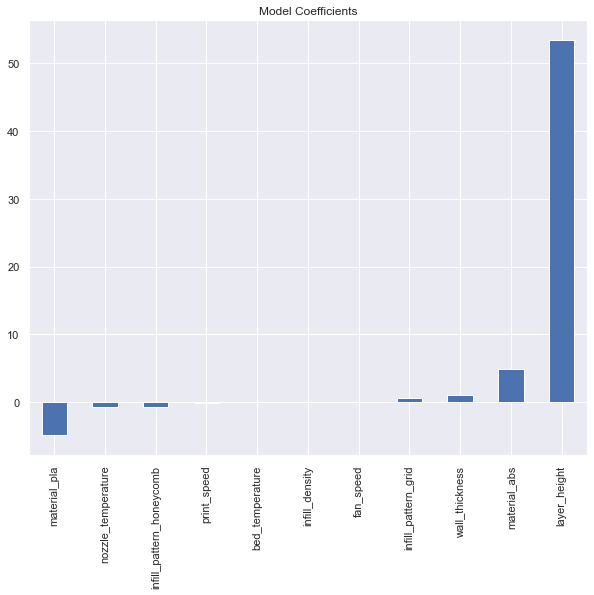

In [92]:
model = LinearRegression()
train2(model, x_train, y2_train,x_test,y2_test)
coef = pd.Series(model.coef_, x.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients", figsize = (10,8))
plt.show()

Model Report
CV Score: 0.33700685747028397
R2_Score: 0.6951850040151053
R2_Score on testing: 0.6355240772059776
material_pla               -0.749084
nozzle_temperature         -0.092128
infill_pattern_honeycomb   -0.024408
print_speed                -0.004651
bed_temperature             0.003396
infill_density              0.006075
fan_speed                   0.016978
wall_thickness              0.017105
infill_pattern_grid         0.024408
material_abs                0.749084
layer_height                6.209596
dtype: float64


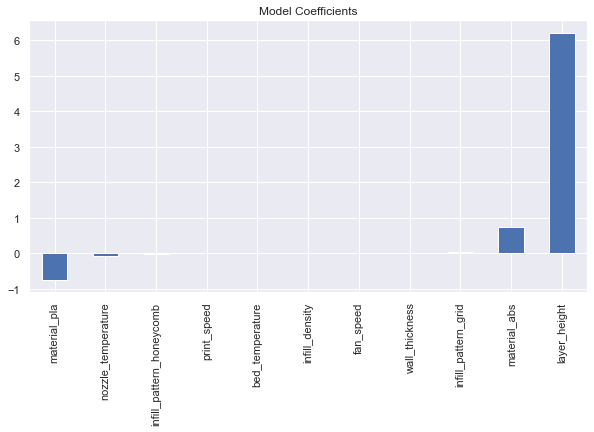

In [93]:
model = LinearRegression()
train3(model, x_train, y3_train,x_test,y3_test)
coef = pd.Series(model.coef_, x.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients", figsize=(10,5))
plt.show()

LINEAR REGRESSION PERFORMED FOR ROUGHNESS, TENSILE STRENGTH AND ELONGATION

R-Squared for Roughness = 0.61
R-Squared for Tensile Strength = 0.548
R-Squared for Elongation = 0.63

# Ridge Regression

Model Report
CV Score: 11517.136810413698
R2_Score: 0.42176709005258906
R2_Score on testing: -0.1385628431669712


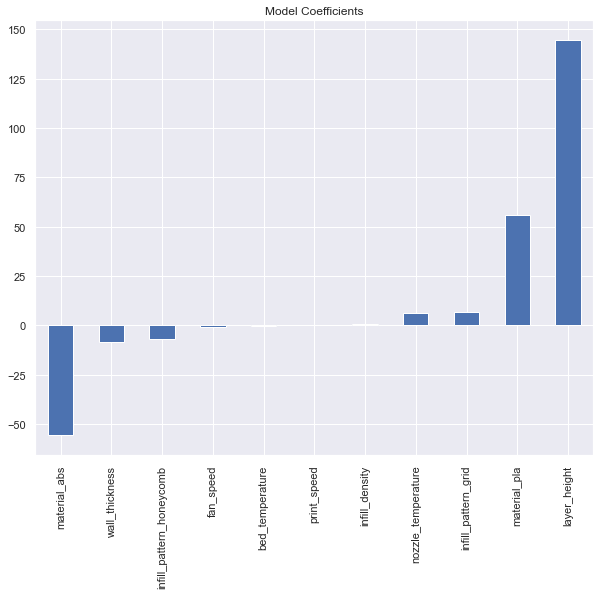

In [94]:
model = Ridge()
train1(model, x_train, y1_train,x_test,y1_test)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients", figsize=(10,8))
plt.show()	


Model Report
CV Score: 50.40085258248412
R2_Score: 0.4896906514255913
R2_Score on testing: 0.42309186650924213


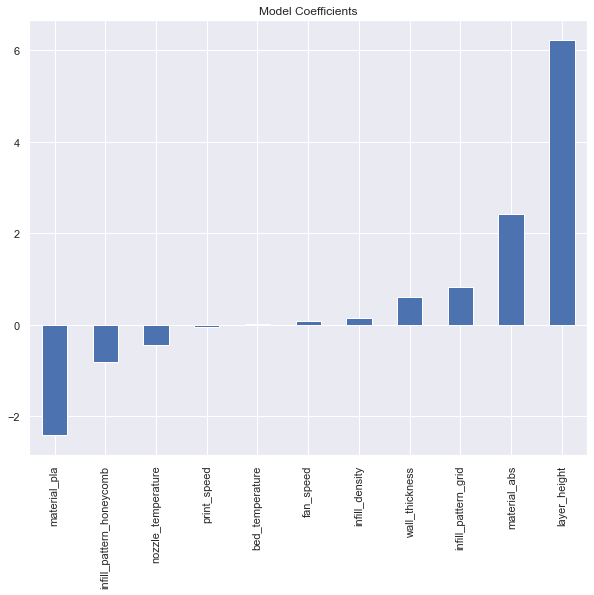

In [95]:
model = Ridge()
train2(model, x_train, y2_train,x_test,y2_test)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients",figsize=(10,8))
plt.show()	


Model Report
CV Score: 0.5097527691078045
R2_Score: 0.479196692319089
R2_Score on testing: 0.3856260799559249


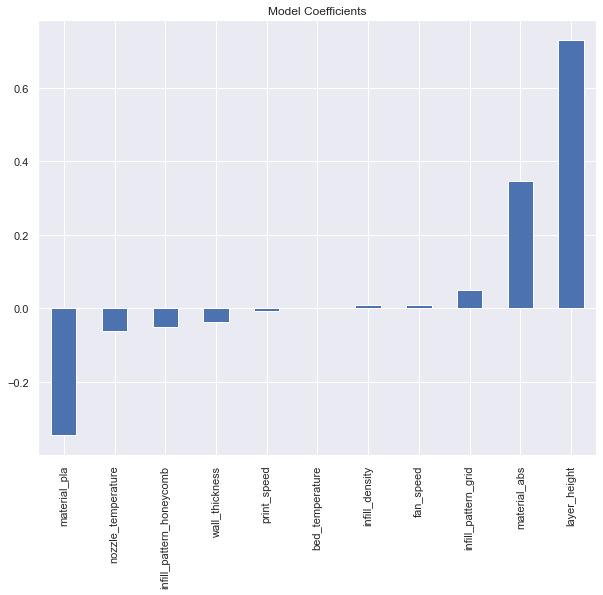

In [96]:
model = Ridge()
train3(model, x_train, y3_train,x_test,y3_test)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients",figsize=(10,8))
plt.show()	


RIDGE REGRESSION PERFORMED FOR ROUGHNESS, TENSILE STRENGTH and ELONGATION. 

R-Squared for Roughness = 0.7818
R-Squared for Tensile Strength = 0.492
R-Squared for Elongation = 0.5591

# Lasso Regression

In [97]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5)

# Fit the model to the training data
model.fit(x_train, y1_train)

# Print the optimal alpha value
print("Optimal alpha:", model.alpha_)

# Use the optimal alpha to fit the model to the entire training data
lasso = Lasso(alpha=model.alpha_)
lasso.fit(x_train, y1_train)

# Make predictions on the test data
y1_pred = lasso.predict(x_test)

# Calculate the R-squared score
r2 = np.corrcoef(y1_test, y1_pred)[0,1]**2
print("R-square score on training data: ", r2_score(y1_train,lasso.predict(x_train)))
print("R-squared score on test data:", r2)


Optimal alpha: 0.7407142857142857
R-square score on training data:  0.8957912254043494
R-squared score on test data: 0.7459956174438422


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+03, tolerance: 3.739e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+03, tolerance: 3.739e+01
  model = cd_fast.enet_coordinate_descent(


In [98]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5)

# Fit the model to the training data
model.fit(x_train, y2_train)

# Print the optimal alpha value
print("Optimal alpha:", model.alpha_)

# Use the optimal alpha to fit the model to the entire training data
lasso = Lasso(alpha=model.alpha_)
lasso.fit(x_train, y2_train)

# Make predictions on the test data
y2_pred = lasso.predict(x_test)

# Calculate the R-squared score
r2 = np.corrcoef(y2_test, y2_pred)[0,1]**2
print("R-square score on training data: ", r2_score(y2_train,lasso.predict(x_train)))
print("R-squared score on test data:", r2)


Optimal alpha: 0.09493877551020408
R-square score on training data:  0.581262149605217
R-squared score on test data: 0.5601456511903756


In [99]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5)

# Fit the model to the training data
model.fit(x_train, y3_train)

# Print the optimal alpha value
print("Optimal alpha:", model.alpha_)

# Use the optimal alpha to fit the model to the entire training data
lasso = Lasso(alpha=model.alpha_)
lasso.fit(x_train, y3_train)

# Make predictions on the test data
y3_pred = lasso.predict(x_test)

# Calculate the R-squared score
r2 = np.corrcoef(y3_test, y3_pred)[0,1]**2
print("R-square score on training data: ", r2_score(y3_train,lasso.predict(x_train)))
print("R-squared score on test data:", r2)


Optimal alpha: 0.00809142857142857
R-square score on training data:  0.6523670496327629
R-squared score on test data: 0.7268456433914993


LASSO REGRESSION PERFORMED FOR ROUGHNESS, TENSILE STRENGTH and ELONGATION. 

R-Squared for Roughness = 0.778
R-Squared for Tensile Strength = 0.0.540
R-Squared for Elongation = -0.002

# DECISION TREE REGRESSOR for Roughness

In [100]:
import sklearn
print(sklearn.__version__)

1.2.2


Model Report
CV Score: 3482.675
R2_Score: 1.0
R2_Score on testing: 0.39720661078300634


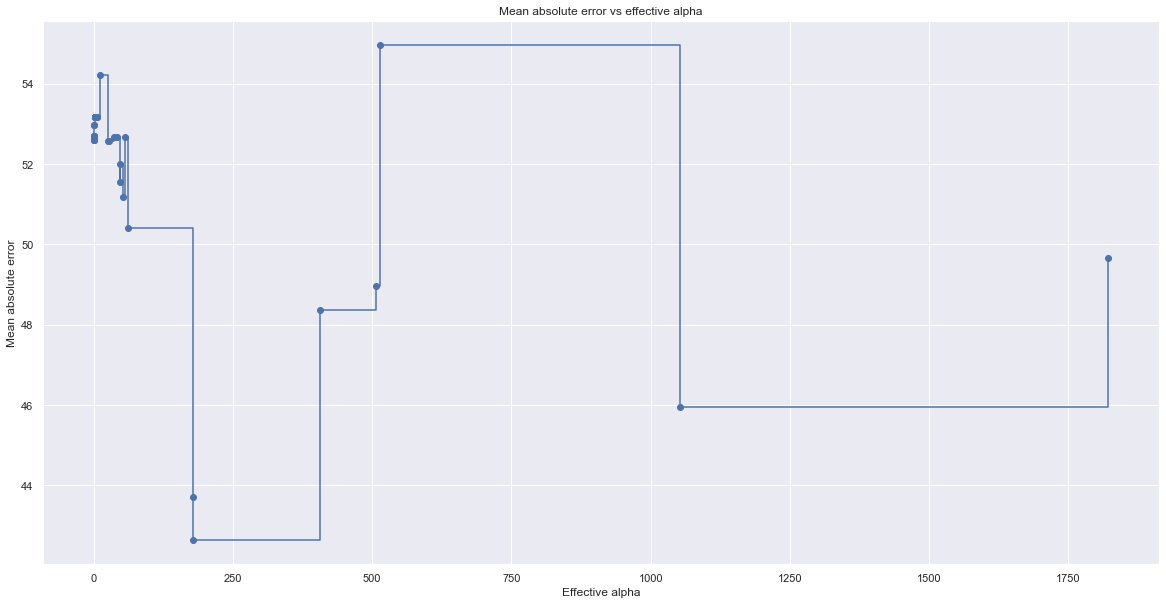

In [101]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
train1(model,x_train, y1_train,x_test,y1_test)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
path= model.cost_complexity_pruning_path(x_train, y1_train)
ccp_alphas,impurities = path.ccp_alphas, path.impurities
trees=[]
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(x_train, y1_train)
    trees.append(tree)
mae = []
for tree in trees:
    y1_pred = tree.predict(x_test)
    mae.append(np.mean(np.abs(y1_test - y1_pred)))
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], mae[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Mean absolute error")
ax.set_title("Mean absolute error vs effective alpha")

plt.show()

In [102]:
optimal_alpha=200 #from the graph
pruned_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=optimal_alpha)
pruned_tree.fit(x_train, y1_train)
y1_pred = pruned_tree.predict(x_test)
mae = np.mean(np.abs(y1_test - y1_pred))
print("R_Square value on training data:", r2_score(y1_train,pruned_tree.predict(x_train)))
print("R-squared value on test data:", r2_score(y1_test,y1_pred))

R_Square value on training data: 0.9258989559341555
R-squared value on test data: 0.5199784081505641


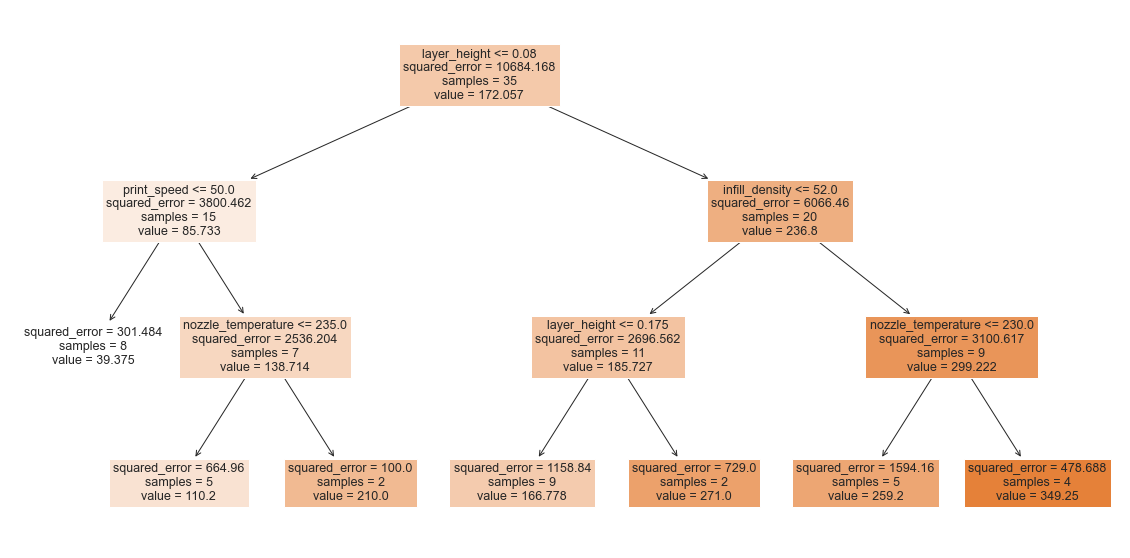

In [103]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(pruned_tree, filled=True, feature_names=x.columns)
plt.show()

# for Tensile Strength

Model Report
CV Score: 74.05
R2_Score: 1.0
R2_Score on testing: 0.47908928836725595


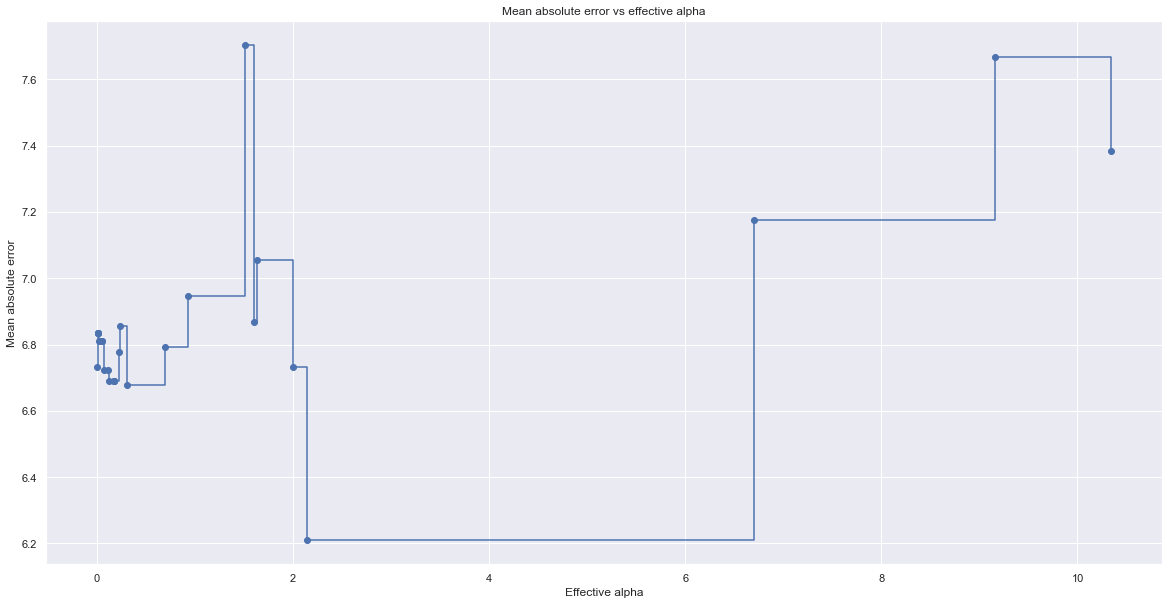

In [104]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
train2(model,x_train, y2_train,x_test,y2_test)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
path= model.cost_complexity_pruning_path(x_train, y2_train)
ccp_alphas,impurities = path.ccp_alphas, path.impurities
trees=[]
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(x_train, y2_train)
    trees.append(tree)
mae = []
for tree in trees:
    y2_pred = tree.predict(x_test)
    mae.append(np.mean(np.abs(y2_test - y2_pred)))
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], mae[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Mean absolute error")
ax.set_title("Mean absolute error vs effective alpha")

plt.show()

In [105]:
optimal_alpha=2.1 #from the graph
pruned_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=optimal_alpha)
pruned_tree.fit(x_train, y2_train)
y2_pred = pruned_tree.predict(x_test)
mae = np.mean(np.abs(y2_test - y2_pred))
print("R_Square value on training data:", r2_score(y2_train,pruned_tree.predict(x_train)))
print("R-squared value on test data:", r2_score(y2_test,y2_pred))

R_Square value on training data: 0.8039955730225414
R-squared value on test data: 0.46680409052642


# for Elongation

Model Report
CV Score: 0.3765555555555556
R2_Score: 1.0
R2_Score on testing: 0.6193609022556392


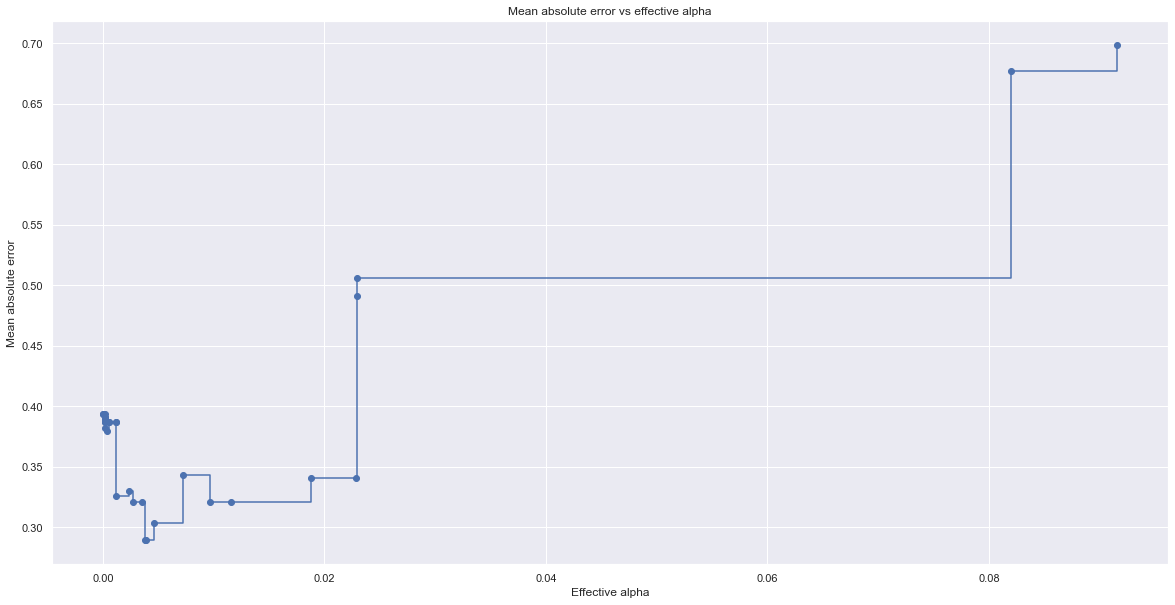

In [106]:
from sklearn.tree import DecisionTreeRegressor

modele = DecisionTreeRegressor(random_state=0)
train3(modele,x_train, y3_train,x_test,y3_test)
coef = pd.Series(modele.feature_importances_, x.columns).sort_values(ascending=False)
path= modele.cost_complexity_pruning_path(x_train, y3_train)
ccp_alphas,impurities = path.ccp_alphas, path.impurities
trees=[]
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(x_train, y3_train)
    trees.append(tree)
mae = []
for tree in trees:
    y3_pred = tree.predict(x_test)
    mae.append(np.mean(np.abs(y3_test - y3_pred)))
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], mae[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Mean absolute error")
ax.set_title("Mean absolute error vs effective alpha")

plt.show()

In [107]:
optimal_alpha=0.004 #from the graph
pruned_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=optimal_alpha)
pruned_tree.fit(x_train, y3_train)
y3_pred = pruned_tree.predict(x_test)
mae = np.mean(np.abs(y3_test - y3_pred))
print("R_Square value on training data:", r2_score(y3_train,pruned_tree.predict(x_train)))
print("R-squared value on test data:", r2_score(y3_test,y3_pred))
with open('modele.pkl', 'wb') as dtr_elongation:
    pickle.dump(modele, dtr_elongation)

R_Square value on training data: 0.9594477499855584
R-squared value on test data: 0.7572462406015038


DECISION TREE REGRESSION PERFORMED FOR ROUGHNESS, TENSILE STRENGTH and ELONGATION. 

R-Squared for Roughness = 0.510
R-Squared for Tensile Strength = 0.517
R-Squared for Elongation = 0.522

# Random Forest Regression

The VALIDATION ACCURACY measures the percentage of correctly predicted targets in the validation set, while the R-SQUARED value measures the proportion of the variance in the target variable that is explained by the independent variables.

# for Roughness

Model Report
CV Score: 2315.0382550000004
R2_Score: 0.964577839452095
R2_Score on testing: 0.6812669900783107
Best hyperparameters: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Validation accuracy: 0.591006454127118


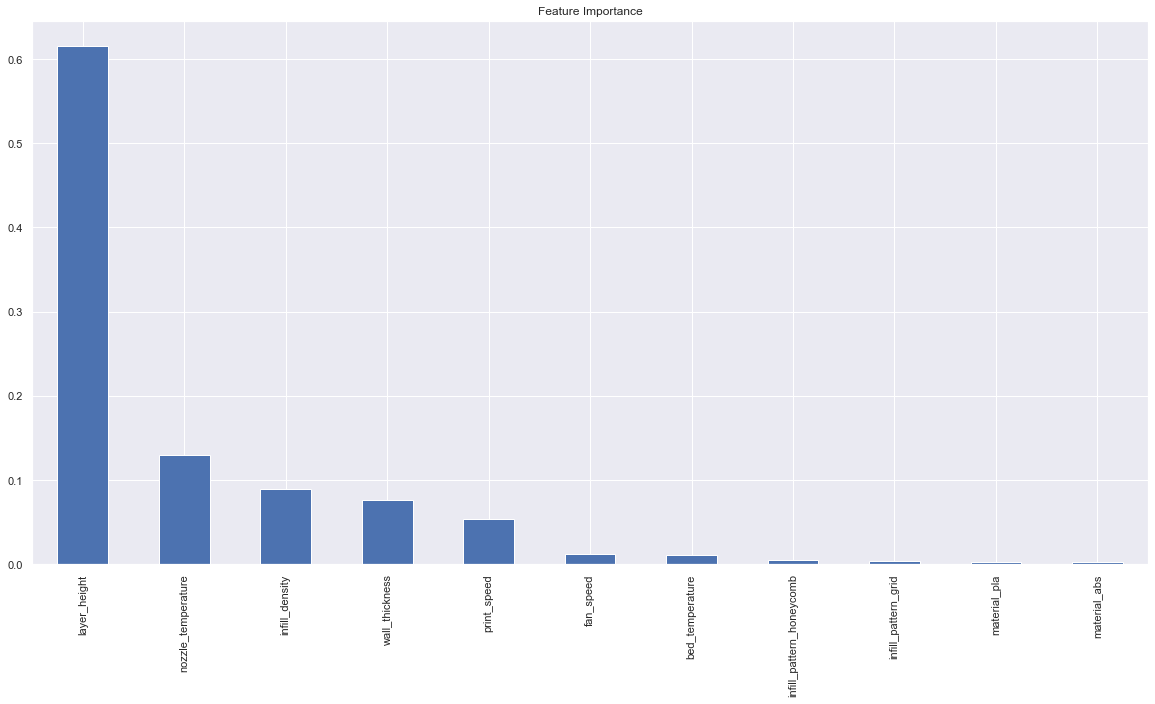

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
modelr = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(modelr, param_distributions=param_grid, n_iter=10, cv=5, random_state=0)
train1(modelr, x_train, y1_train,x_test,y1_test)
random_search.fit(x_train, y1_train)
print("Best hyperparameters:", random_search.best_params_)
print("Validation accuracy:", random_search.best_score_)
coef = pd.Series(modelr.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()
y1_pred=modelr.predict(x_test)

# for Tensile Strength

Model Report
CV Score: 42.57324249999999
R2_Score: 0.92076742783575
R2_Score on testing: 0.5240480612093299
Best hyperparameters: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Validation accuracy: 0.5381029633715115


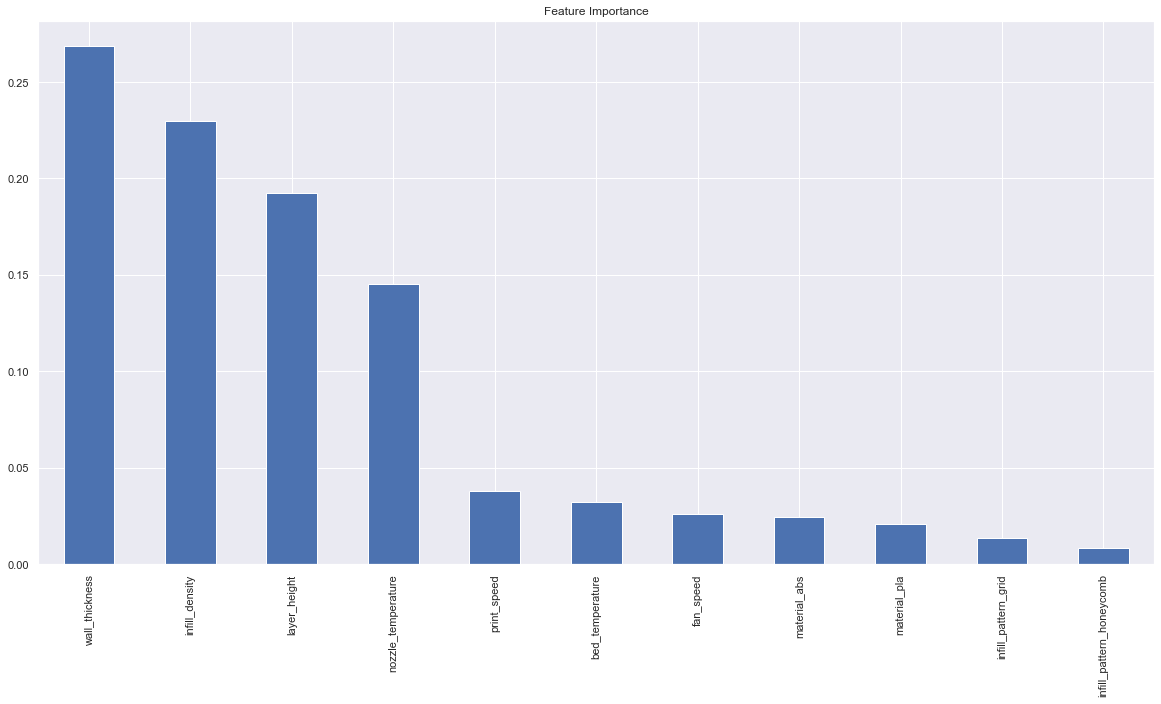

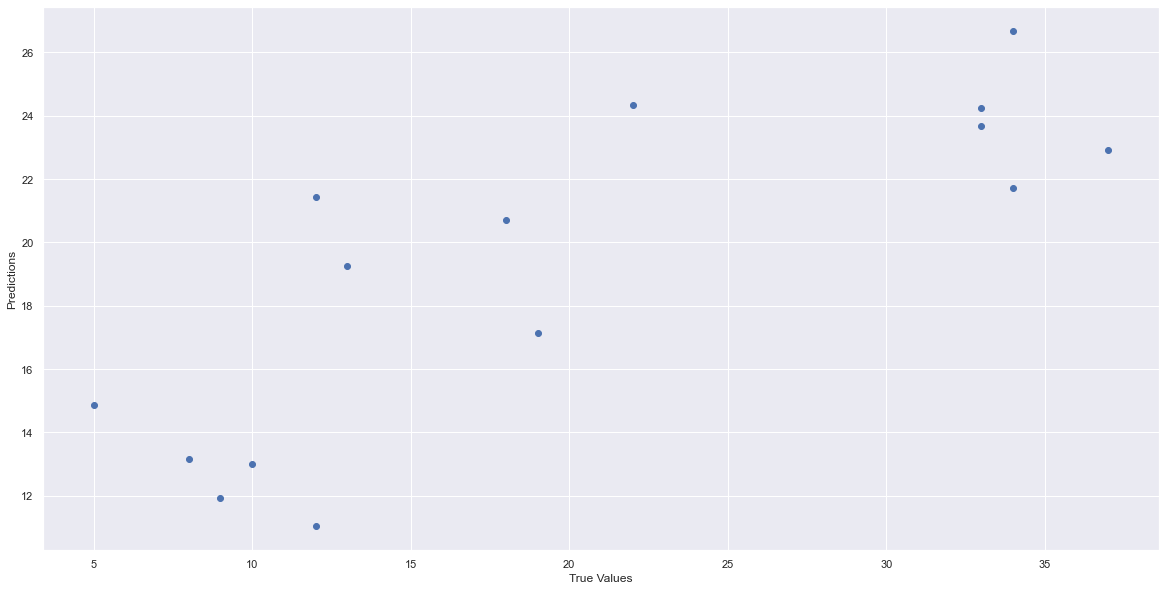

In [110]:
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, random_state=0)
train2(model, x_train, y2_train,x_test,y2_test)
random_search.fit(x_train, y2_train)
print("Best hyperparameters:", random_search.best_params_)
print("Validation accuracy:", random_search.best_score_)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()
y2_pred=model.predict(x_test)
plt.scatter(y2_test, y2_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


# for Elongation

Model Report
CV Score: 0.35695613333333326
R2_Score: 0.904069146785281
R2_Score on testing: 0.5674730263157894
Best hyperparameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Validation accuracy: 0.3938219874863865


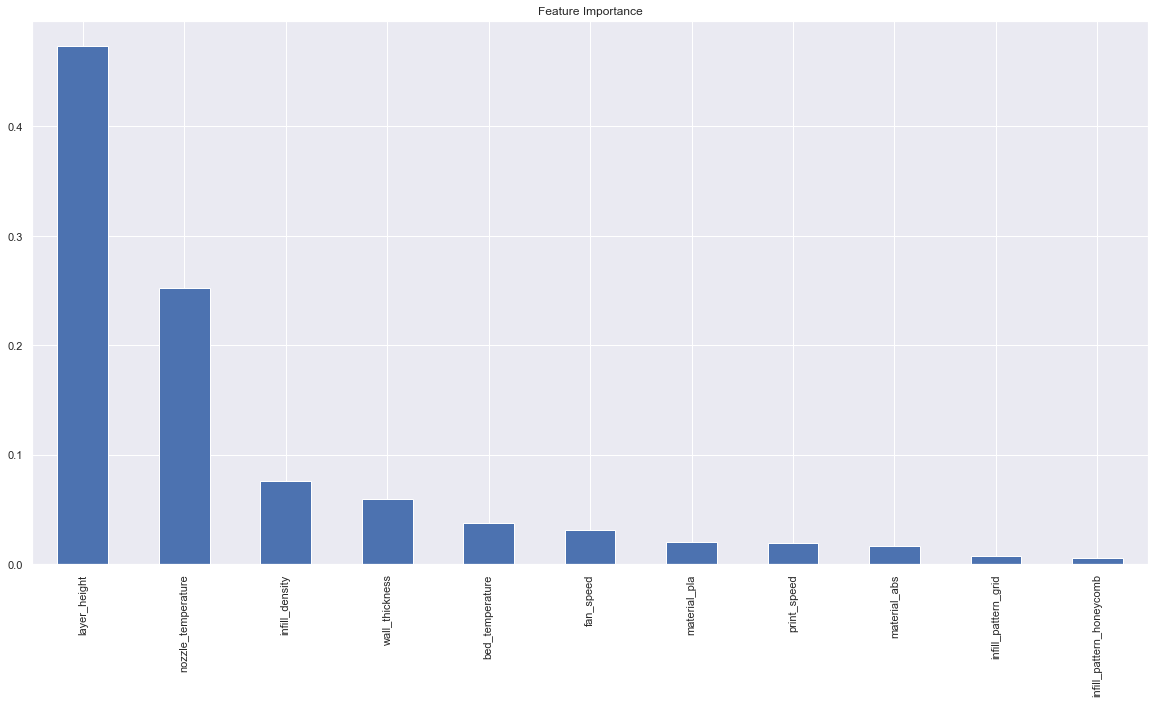

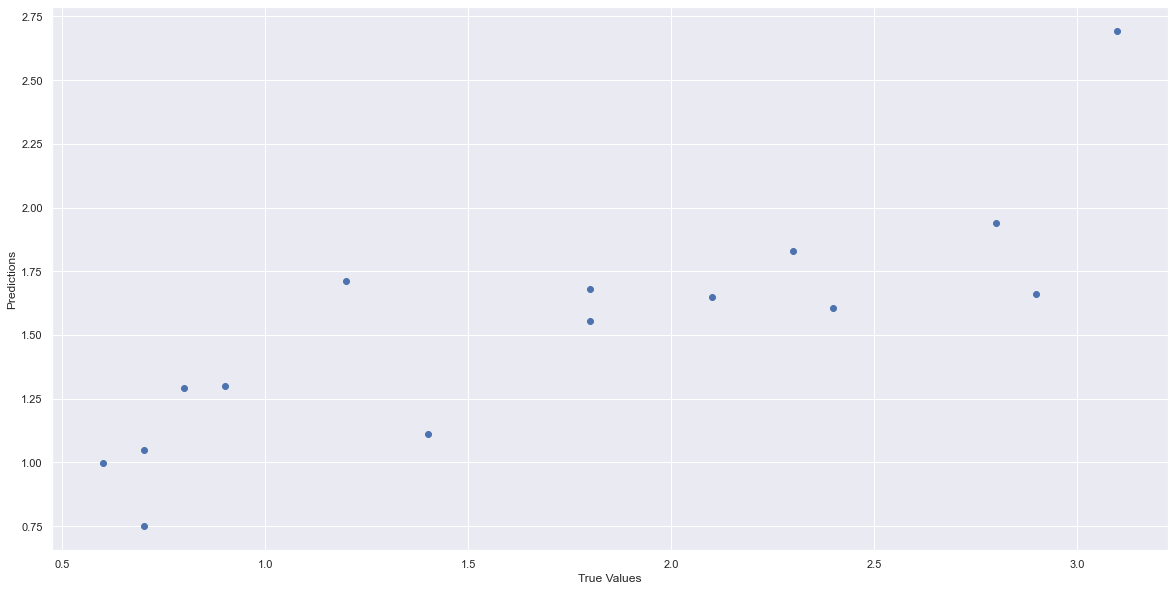

In [111]:
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, random_state=0)
train3(model, x_train, y3_train,x_test,y3_test)
random_search.fit(x_train, y3_train)
print("Best hyperparameters:", random_search.best_params_)
print("Validation accuracy:", random_search.best_score_)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()
y3_pred=model.predict(x_test)
plt.scatter(y3_test, y3_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


Roughness:
R-Squared: 0.965
Validation Accuracy: 0.522

Tensile Strength:
R-Squared: 0.925
Validation Accuracy: 0.503

Elongation:
R-Squared: 0.924
Validation Accuracy: 0.341

# KNN Regressor

#  Roughness

In [112]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor()

param_grid = {'n_neighbors': [2,3,4,5]}
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=4, cv=5, random_state=0)
train1(model, x_train, y1_train,x_test,y1_test)
random_search.fit(x_train, y1_train)
print(f"Best hyperparameters: {random_search.best_params_}")

best_model = random_search.best_estimator_
y1_pred = model.predict(x_test)
mse = mean_squared_error(y1_test, y1_pred)
print(f"Mean Squared Error: {mse:.2f}")

Model Report
CV Score: 13122.693999999998
R2_Score: 0.3050753867671917
R2_Score on testing: -0.08425539701797824
Best hyperparameters: {'n_neighbors': 5}
Mean Squared Error: 7689.52


# Tensile Strength

In [113]:
model = KNeighborsRegressor()

param_grid = {'n_neighbors': [2,3,4,5]}
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=4, cv=5, random_state=0)
train2(model, x_train, y2_train,x_test,y2_test)
random_search.fit(x_train, y2_train)
print(f"Best hyperparameters: {random_search.best_params_}")

best_model = random_search.best_estimator_
y2_pred = model.predict(x_test)
mse = mean_squared_error(y2_test, y2_pred)
print(f"Mean Squared Error: {mse:.2f}")

Model Report
CV Score: 69.312
R2_Score: 0.29104485702669736
R2_Score on testing: 0.22512999554300994
Best hyperparameters: {'n_neighbors': 2}
Mean Squared Error: 92.72


# Elongation %

In [114]:
model = KNeighborsRegressor()

param_grid = {'n_neighbors': [2,3,4,5]}
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=4, cv=5, random_state=0)
train3(model, x_train, y3_train,x_test,y3_test)
random_search.fit(x_train, y3_train)
print(f"Best hyperparameters: {random_search.best_params_}")

best_model = random_search.best_estimator_
y3_pred = model.predict(x_test)
mse = mean_squared_error(y3_test, y3_pred)
print(f"Mean Squared Error: {mse:.2f}")

Model Report
CV Score: 0.6262577777777777
R2_Score: 0.2950465022240196
R2_Score on testing: 0.26969924812030066
Best hyperparameters: {'n_neighbors': 5}
Mean Squared Error: 0.52


# Support Vector Regressor

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

model = SVR(kernel='rbf', C=100, epsilon=0.1)

model.fit(x_train, y1_train)

y1_pred = model.predict(x_test)
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
print("MSE:", mse)
print("R-squared on training data:",r2_score(y1_train,model.predict(x_train)))
print("R-squared on testing data:", r2)


MSE: 2433.433039508141
R-squared on training data: 0.929321613612214
R-squared on testing data: 0.6568754738438075


In [116]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

modelt = SVR(kernel='rbf', C=100, epsilon=0.1)

modelt.fit(x_train, y2_train)

y2_pred = modelt.predict(x_test)
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
print("MSE:", mse)
print("R-squared on training data:",r2_score(y2_train,modelt.predict(x_train)))
print("R-squared on testing data:", r2)

with open('modelt.pkl', 'wb') as svr_tensile:
    pickle.dump(modelt, svr_tensile)

MSE: 53.153832354077416
R-squared on training data: 0.9952724482344922
R-squared on testing data: 0.5558010592903202


In [117]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

model = SVR(kernel='rbf', C=100, epsilon=0.1)

model.fit(x_train, y3_train)

y3_pred = model.predict(x_test)
mse = mean_squared_error(y3_test, y3_pred)
r2 = r2_score(y3_test, y3_pred)
print("MSE:", mse)
print("R-squared on training data:",r2_score(y3_train,model.predict(x_train)))
print("R-squared on testing data:", r2)

MSE: 0.257878066195853
R-squared on training data: 0.984896322803113
R-squared on testing data: 0.6364500946487034


# Extreme Gradient Boosting (XGBoost)

Model Report
CV Score: 1850.637748337535
R2_Score: 0.9999999999099505
R2_Score on testing: 0.7890851514175767


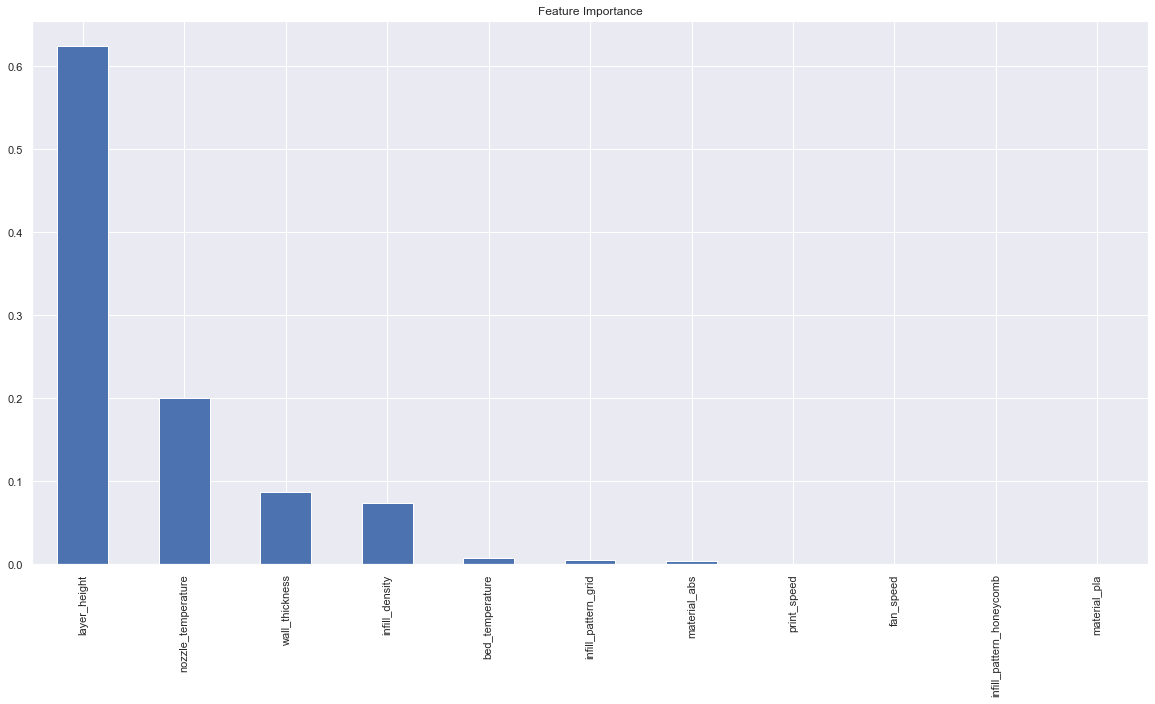

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

'R-square on testing data'

0.7674209336048613

'R_square on training data'

0.985644442812883

In [118]:
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
modelr = XGBRegressor()
train1(modelr, x_train, y1_train,x_test,y1_test)
coef = pd.Series(modelr.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
xgb = RandomizedSearchCV(estimator = modelr, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(x_train,y1_train)

print(xgb.best_params_)
print(xgb.best_score_)
y1_pred=xgb.predict(x_test)
display ("R-square on testing data", r2_score (y1_test,y1_pred))
display ("R_square on training data", r2_score (y1_train, xgb.predict(x_train)))

with open('modelr.pkl', 'wb') as xgb_rough:
    pickle.dump(modelr, xgb_rough)

Model Report
CV Score: 36.16841099099433
R2_Score: 0.9999999854367488
R2_Score on testing: 0.48153877142952184


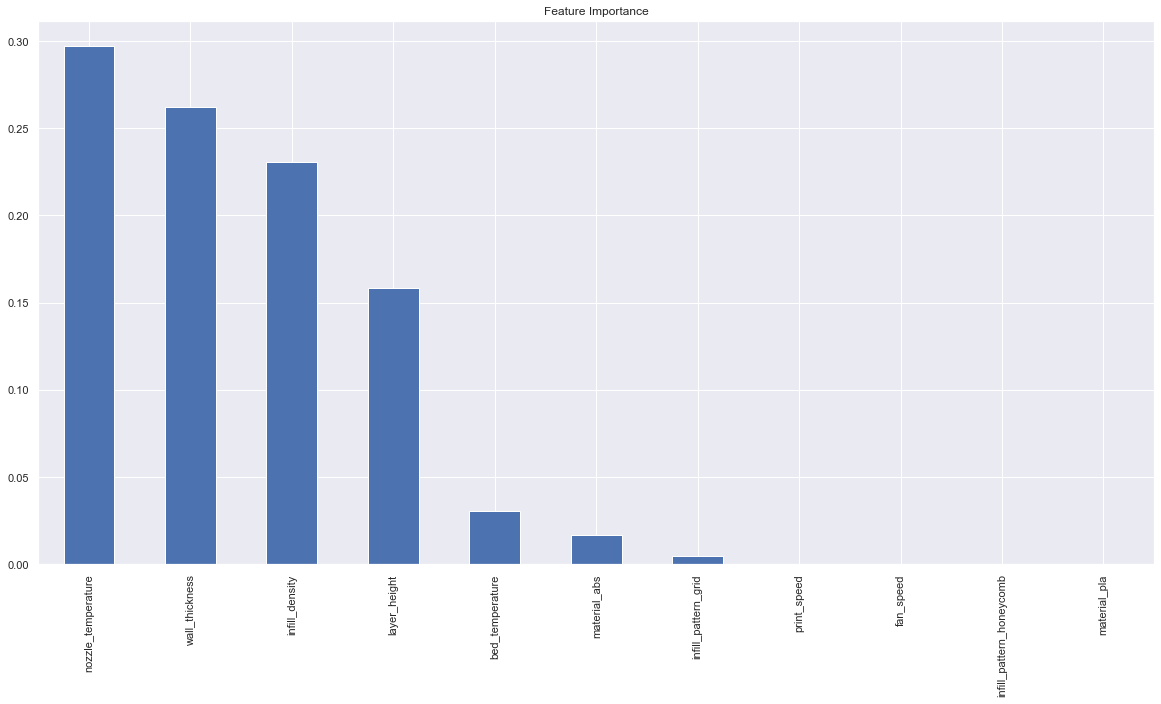

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

'R-square on testing data'

0.6280368690484222

'R_square on training data'

0.9376477233812949

In [119]:
from xgboost import XGBRegressor
model = XGBRegressor()
train2(model, x_train, y2_train,x_test,y2_test)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(x_train,y2_train)

print(xgb.best_params_)
print(xgb.best_score_)
y2_pred=xgb.predict(x_test)
display ("R-square on testing data", r2_score (y2_test,y2_pred))
display ("R_square on training data", r2_score (y2_train, xgb.predict(x_train)))

Model Report
CV Score: 0.31570183506736116
R2_Score: 0.9999983539446435
R2_Score on testing: 0.6286027748788974


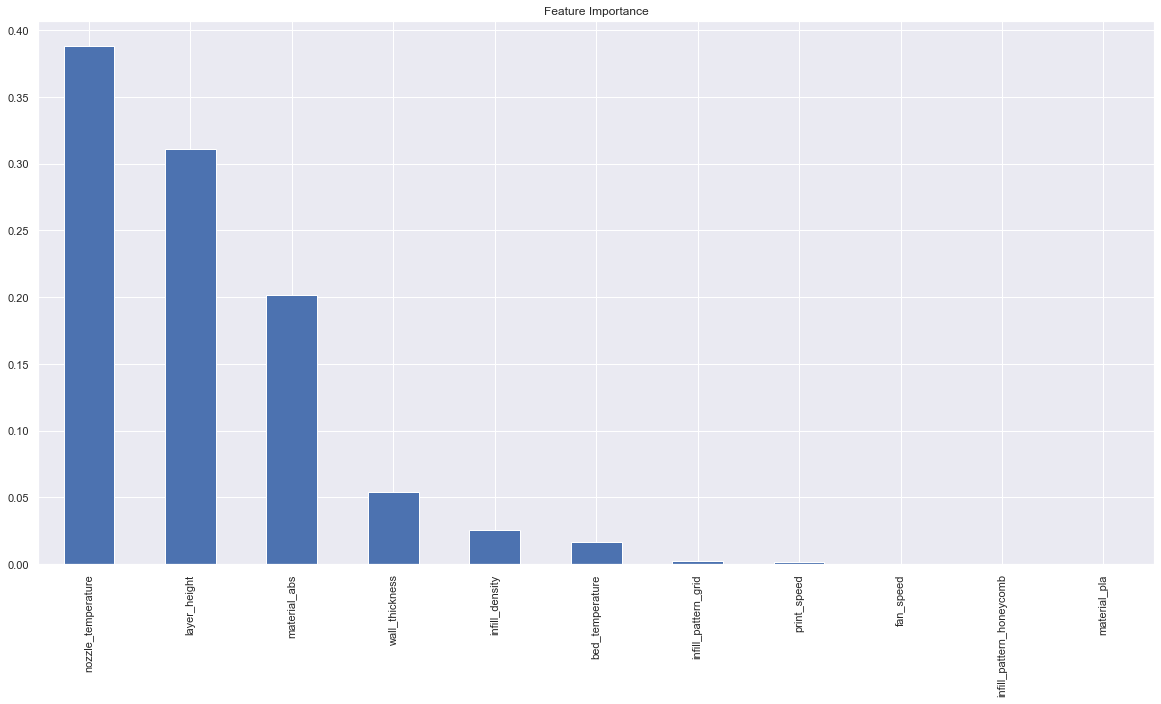

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

'R-square on testing data'

0.6789410407406888

'R_square on training data'

0.9145262744366802

In [120]:
from xgboost import XGBRegressor
model = XGBRegressor()
train3(model, x_train, y3_train,x_test,y3_test)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(x_train,y3_train)

print(xgb.best_params_)
print(xgb.best_score_)
y3_pred=xgb.predict(x_test)
display ("R-square on testing data", r2_score (y3_test,y3_pred))
display ("R_square on training data", r2_score (y3_train, xgb.predict(x_train)))

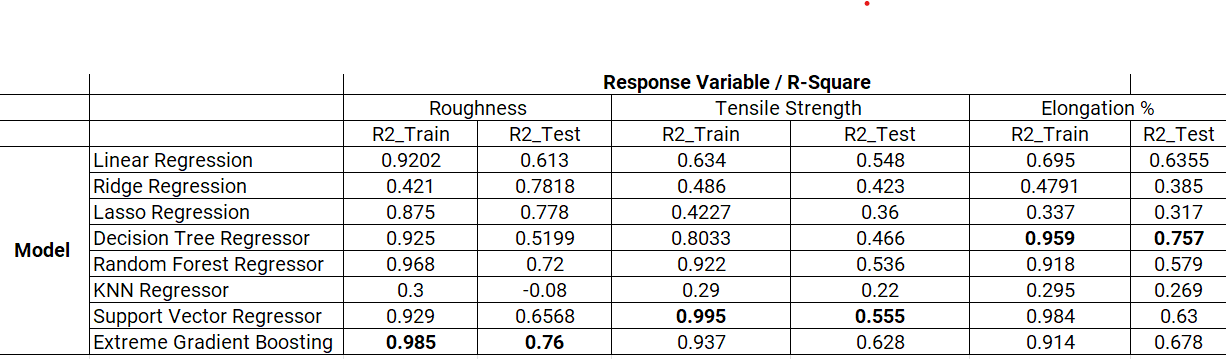
 
Model Evaluation

So now we make a single function for predicting Roughness, Tensile Strength and Elongation % values each with a different model respectively as inferred from above. 

Roughness using Lasso Regression ; Tensile Strength using Support Vector Regressor ; Elongation % using Decision Tree Regressor

In [121]:
#Calling the Shortlisted Trained Models to further predict Roughness, Tensile Strength and Elongation % for new user input values
input_string = input("Enter the adjustment parameters of the 3D printer in the order: Layer Height, Wall Thickness, Infill Density, Infill Pattern (Input 1,0 if Grid or 0,1 if Honeycomb), Nozzle Temperature, Bed Temperature, Print Speed in RPM, Material (1,0 if ABS or 0,1 if PLA), Fan Speed in RPM ")
data = [float(x) for x in input_string.split(',')]
print(data)
data_arr=np.array(data)
newdata=data_arr.reshape(1,-1)
with open('modelr.pkl', 'rb') as xgb_rough:
    modelr_loaded = pickle.load(xgb_rough)
prediction_r = modelr_loaded.predict(newdata)
with open('modelt.pkl', 'rb') as svr_tensile:
    modelt_loaded = pickle.load(svr_tensile)
prediction_t = modelt_loaded.predict(newdata)
with open('modele.pkl', 'rb') as dtr_elongation:
    modele_loaded = pickle.load(dtr_elongation)
prediction_e = modele_loaded.predict(newdata)
print("The Predicted Roughness of the Printed Material in micrometer is: ", prediction_r)
print("The Predicted Tensile Strength of the Printed Material in MPa is: ", prediction_t)
print("The Predicted Elongation % of the Printed Material is: ", prediction_e)

Enter the adjustment parameters of the 3D printer in the order: Layer Height, Wall Thickness, Infill Density, Infill Pattern (Input 1,0 if Grid or 0,1 if Honeycomb), Nozzle Temperature, Bed Temperature, Print Speed in RPM, Material (1,0 if ABS or 0,1 if PLA), Fan Speed in RPM 0.2, 9, 30, 1, 0, 200, 80, 60, 0, 1, 15
[0.2, 9.0, 30.0, 1.0, 0.0, 200.0, 80.0, 60.0, 0.0, 1.0, 15.0]
The Predicted Roughness of the Printed Material in micrometer is:  [273.60538]
The Predicted Tensile Strength of the Printed Material in MPa is:  [17.66911697]
The Predicted Elongation % of the Printed Material is:  [1.8]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
